<h1 align='center'>
       Detecting Flu Epidemics via Search Engine Query Data <br>
       <small>(Incomplete)</small>
</h1>

<img src='http://mariemcallister.org/ENGL202/epidemics/wp-content/uploads/2016/04/epidemics.jpg' heigh=500 width=500/>

Flu epidemics constitute a major public health concern causing respiratory illnesses, hospitalizations, and deaths. According to the National Vital Statistics Reports published in October 2012, influenza ranked as the eighth leading cause of death in 2011 in the United States. Each year, 250,000 to 500,000 deaths are attributed to influenza related diseases throughout the world.

The U.S. Centers for Disease Control and Prevention (CDC) and the European Influenza Surveillance Scheme (EISS) detect influenza activity through virologic and clinical data, including Influenza-like Illness (ILI) physician visits. Reporting national and regional data, however, are published with a 1-2 week lag.


We would like to estimate <i>influenza-like illness</i> (ILI) activity using Google web search logs. Fortunately, one can easily access this data online:

ILI Data - The CDC publishes on its website the official regional and state-level percentage of patient visits to healthcare providers for ILI purposes on a weekly basis.

Google Search Queries - Google Trends allows public retrieval of weekly counts for every query searched by users around the world. For each location, the counts are normalized by dividing the count for each query in a particular week by the total number of online search queries submitted in that location during the week. Then, the values are adjusted to be between 0 and 1.

The csv file FluTrain.csv (available in the data folder) aggregates this data from January 1, 2004 until December 31, 2011 as follows:

**Week** - The range of dates represented by this observation, in year/month/day format.

**ILI** - This column lists the percentage of ILI-related physician visits for the corresponding week.

**Queries** - This column lists the fraction of queries that are ILI-related for the corresponding week, adjusted to be between 0 and 1 (higher values correspond to more ILI-related search queries).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Before applying analytics tools on the training set, we first need to understand the data at hand.
# Load "FluTrain.csv" into a data frame called FluTrain.


from IPython.display import display

fluTrain = pd.read_csv('data/FluTrain.csv')

display(fluTrain.head())  # first 5 rows
print(fluTrain.shape)     # number of rows and columns

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


(417, 3)


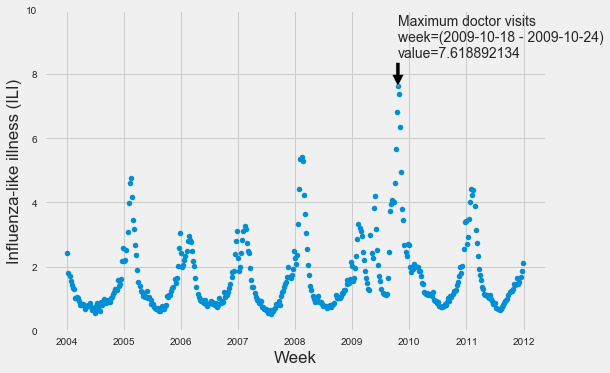

In [90]:
# Looking at the time period 2004-2011, which week corresponds to the highest percentage of
# ILI-related physician visits?

# 1 - Select the day of the month corresponding to the start of this week.


plt.plot_date(fluTrain.Week, fluTrain.ILI, fmt='.', markersize=11)

maxILI = fluTrain.ILI.max()
index = fluTrain.ILI.index[fluTrain.ILI == maxILI][0]
weekAtMax = fluTrain.Week[index]

plt.annotate(s='Maximum doctor visits\nweek=({})\nvalue={}'.format(weekAtMax, maxILI),
             xy=(weekAtMax, maxILI),
             xytext=(weekAtMax, maxILI+0.9),
            arrowprops=dict(facecolor='black', shrink=2),)

plt.ylim(0, 10)
plt.xlabel('Week')
plt.ylabel('Influenza-like illness (ILI)')
plt.show()

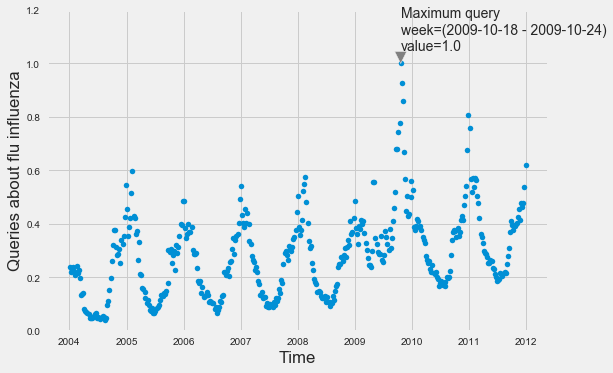

In [97]:
# 2 - Which week corresponds to the highest percentage of ILI-related query fraction?

plt.plot_date(fluTrain.Week, fluTrain.Queries, fmt='.', markersize=11)

max_query = fluTrain.Queries.max()
index = fluTrain.Queries.index[fluTrain.Queries == max_query][0]
max_week  = fluTrain.Week[index]

plt.annotate(s='Maximum query\nweek=({})\nvalue={}'.format(max_week, max_query),
             xy=(max_week, max_query),
             xytext=(max_week, max_query+0.05),
             arrowprops=dict(facecolor='grey', shrink=0.5))

plt.ylim(0, 1.2)
plt.xlabel('Time')
plt.ylabel('Queries about flu influenza')
plt.show()

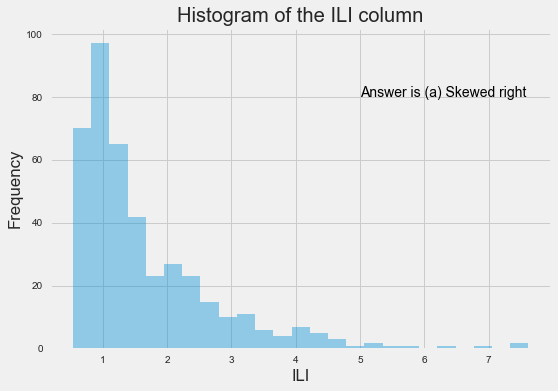

In [126]:
# 3 - Let us now understand the data at an aggregate level.
#     Plot the histogram of the dependent variable, ILI. What best describes the distribution of values of ILI?


#         (a) Most of the ILI values are small, with a relatively small number of much larger values
#                   (in statistics, this sort of data is called "skew right").
#         (b) The ILI values are balanced, with equal numbers of unusually large and unusually small values.
#         (c) Most of the ILI values are large, with a relatively small number of much smaller values
#                   (in statistics, this sort of data is called "skew left").

ax = sns.distplot(fluTrain.ILI, kde=False, bins=25)
ax.text(5, 80, 'Answer is (a) Skewed right', color='black')
ax.set(ylabel='Frequency', title='Histogram of the ILI column')
sns.plt.show()

<h3>When handling a skewed dependent variable, it is often useful to <i>predict</i> the logarithm of the dependent variable instead of the dependent variable itself -- this prevents the small number of unusually large or small observations from having an undue influence on the sum of squared errors of predictive models.</h3>

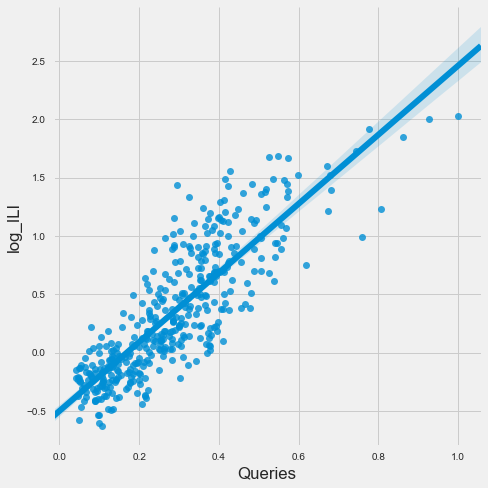

In [158]:
# 4 - Plot the natural logarithm of ILI versus Queries. What does the plot suggest?.

# A) There is a negative, linear relationship between log(ILI) and Queries.
# B) There is no apparent linear relationship between log(ILI) and Queries.
# C) There is a positive, linear relationship between log(ILI) and Queries.


fluTrain['log_ILI'] = np.log(fluTrain.ILI)
ax = sns.lmplot('Queries', 'log_ILI', data=fluTrain, size=7)
sns.plt.show()


# Answer is C

In [154]:
# 5 - Based on the plot we just made, it seems that a linear regression model could be a good modeling choice.
#     Based on our understanding of the data from the previous subproblem,
#     which model best describes our estimation problem?


# The answer is: Since there's a positive linear relationship between the log of the ILI column and our queries
#                column, and the log of the ILI column is a continuous variable, then this is a linear regression
#                problem where ILI is our independent variable (on the x axis), and Queries is our dependent 
#                variable (on the y axis)

#                The equation shall be: 
#                                      log(ILI) = y-intercept + coefficient*Queries

The problem was clearly defined in the introduction. I'm glad there's a question that directly asks us what are we trying to estimate.

In the introduction at the top of the page, this sentence gives us a sense of the right modelling question:

<q>We would like to estimate influenza-like illness (ILI) activity using Google web search logs</q>

So what we ought to be modelling the ILI column (as our dependent variable) with the Queries column as our independent variable. In other words, we are trying to predict the influenza-like activity based on the percentage of search queries about epidemics.

In other other words, what's the relationship between how much people search google about influenza-like questions and the actual propogation of influenza-like diseases (measured by how much people go the doctor about them)

In [157]:
# 6 - Implement the linear regression algorithm and find out
#     What is the training set R-squared value for FluTrend1 model (the "Multiple R-squared")?


from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(fluTrain.Queries.values.reshape(-1, 1), fluTrain.log_ILI)

r2 = lm.score(fluTrain.Queries.values.reshape(-1, 1), fluTrain.log_ILI)

print('R2: {}'.format(r2))

R2: 0.7090200553481865


In [164]:
# 7 - For a single variable linear regression model, there is a direct relationship between
#     the R-squared and the correlation between the independent and the dependent variables.
#                       What is the relationship we infer from our problem?
#     (Don't forget that you can use the corr method to compute the correlation between two variables.)


# Answer: R2 is the square of the coefficient of correlation between two variables.
#         Then the square root of R2 is exactly the value of the correlation between them.

display(fluTrain.corr())
print(np.sqrt(r2))

# Notice that the square root of the r2 value is equal to the correlation value.

,ILI,Queries,log_ILI
ILI,1.000000,0.814212,0.945168
Queries,0.814212,1.000000,0.842033
log_ILI,0.945168,0.842033,1.000000


0.842033286366


The csv file FluTest.csv (availabe in the data folder) provides the 2012 weekly data of the ILI-related search queries and the observed weekly percentage of ILI-related physician visits.

Load this data into a data frame called FluTest.

<p style='color: blue'>Note 1: The training data was stopped at year 2011. Now our linear regression is trained and ready to go. Next, we will feed it the queries of the year 2012 and ask it to predict the influenza-related physician visits.</p>

<p style='color: blue'>Note 2: We have the trained the model to predict the logarithm of the of ILI column.
Therefore, when we feed it the Queries column of the testing data,
it output its estimates of the logarithm of the ILI column</p>

In [169]:
fluTest = pd.read_csv('data/FluTest.csv')

display(fluTest.head(3))

fluTest['log_ILI'] = np.log(fluTest.ILI)

display(fluTest.head(3))

,Week,ILI,Queries
0,2012-01-01 - 2012-01-07,1.766707,0.593625
1,2012-01-08 - 2012-01-14,1.543401,0.499336
2,2012-01-15 - 2012-01-21,1.647615,0.500664


,Week,ILI,Queries,log_ILI
0,2012-01-01 - 2012-01-07,1.766707,0.593625,0.569117
1,2012-01-08 - 2012-01-14,1.543401,0.499336,0.433988
2,2012-01-15 - 2012-01-21,1.647615,0.500664,0.499329


In [194]:
# Exponentiation is the opposite of the logarithm. Since the model predict the logarithm of the ILI variable,
# exponentiation will reverse the logarithm and give us the actual value of the ILI prediction.
our_predictions = np.exp( lm.predict(fluTest.Queries.values.reshape(-1, 1)) )

In [199]:
# 7 - What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012?


# find index (row number) of the the week in question
index = fluTest.index[fluTest.Week == '2012-03-11 - 2012-03-17']

# index into the prediction array
our_predictions[index]

array([ 2.18737772])

In [203]:
# 8 - What is the relative error betweeen the estimate (our prediction) and the observed
#     value for the week of March 11, 2012? Note that the relative error is calculated as

#     (Observed ILI - Estimated ILI)/Observed ILI


observed_ILI = fluTest.ILI[index]

(observed_ILI - our_predictions[index]) / observed_ILI

10    0.046238
Name: ILI, dtype: float64

In [211]:
# 9 - What is the Root Mean Square Error (RMSE) between our estimates and the actual observations
#     for the percentage of ILI-related physician visits, on the test set?


from sklearn.metrics import mean_squared_error

mse  = mean_squared_error(fluTest.ILI, our_predictions)
rmse = np.sqrt(mse)

rmse

0.74906452710196547


The rest of the questions on this assignment is related to an R library....